# CSCI S-89B — Assignment 3
Student: InJoo Kim


## Problem 1 (25 points)

### (a) Load and preprocess the text (tokenization, stemming, lemmatization)
Methods: NLTK `word_tokenize`, `PorterStemmer`, `WordNetLemmatizer(pos='v')`. If SpaCy is available, `en_core_web_sm` lemmatization is additionally shown.


In [54]:
# Problem 1-(a)
import nltk, sys
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt', quiet=True); nltk.download('wordnet', quiet=True)

text = (
    "Urban delivery robots operate on sidewalks where pedestrians, pets, and bicycles share space. "
    "During peak hours, a robot must plan short detours, yield at crossings, and recover quickly after stops. "
    "Well-designed policies improve safety and keep travel times predictable for both people and machines."
)

# NLTK
tokens_nltk = word_tokenize(text)
porter = PorterStemmer()
stems_nltk = [porter.stem(w) for w in tokens_nltk]
wnl = WordNetLemmatizer()
lemmas_nltk_v = [wnl.lemmatize(w, pos='v') for w in tokens_nltk]

# SpaCy
lemmas_spacy = None
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    lemmas_spacy = [t.lemma_ for t in nlp(text)]
except Exception:
    lemmas_spacy = None

print("NLTK tokens (first 15):", tokens_nltk[:15])
print("NLTK stems (first 15):", stems_nltk[:15])
print("NLTK lemmas (verb POS, first 15):", lemmas_nltk_v[:15])
print("SpaCy lemmas (first 15):", (lemmas_spacy[:15] if lemmas_spacy else "N/A"))


NLTK tokens (first 15): ['Urban', 'delivery', 'robots', 'operate', 'on', 'sidewalks', 'where', 'pedestrians', ',', 'pets', ',', 'and', 'bicycles', 'share', 'space']
NLTK stems (first 15): ['urban', 'deliveri', 'robot', 'oper', 'on', 'sidewalk', 'where', 'pedestrian', ',', 'pet', ',', 'and', 'bicycl', 'share', 'space']
NLTK lemmas (verb POS, first 15): ['Urban', 'delivery', 'robots', 'operate', 'on', 'sidewalks', 'where', 'pedestrians', ',', 'pet', ',', 'and', 'bicycle', 'share', 'space']
SpaCy lemmas (first 15): ['urban', 'delivery', 'robot', 'operate', 'on', 'sidewalk', 'where', 'pedestrian', ',', 'pet', ',', 'and', 'bicycle', 'share', 'space']


### (b) Comparison
NLTK stemming is rule-based and may yield non-words (*operate → oper*, *bicycles → bicycl*), while lemmatization returns base forms given POS (*bicycles → bicycle*). Tokenization differs slightly in punctuation handling. SpaCy infers POS automatically and typically produces cleaner lemmas without manual POS flags.  

For example, in our sample text:  
- NLTK Porter stemmed *bicycles → bicycl* (non-word).  
- NLTK WordNet lemmatizer returned *bicycles → bicycle*.  
- SpaCy also returned *bicycle*.  

This illustrates the difference in linguistic accuracy.


### (c) Importance
Tokenization defines model inputs. Stemming/lemmatization reduce sparsity and improve generalization in classical pipelines (e.g., BoW, n-grams). Choice depends on tolerance for non-words (stemming) vs. linguistic correctness (lemmatization).


## Problem 2 (25 points)

### (a) Tokenize and lemmatize large and small texts
Preprocessing: `word_tokenize → lowercase → cleanup → WordNetLemmatizer(pos='v')`.


In [55]:
# Problem 2-(a)
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Base paragraph (original). 
big_base = (
    "Teams translate raw logs into stable tables that reflect growth, retention, reliability, and cost. "
    "Proposed changes ship to small traffic, expand if guardrails hold, and roll back on anomalies. "
    "Quantitative dashboards are paired with qualitative research to surface friction and clarify priorities. "
    "Data hygiene—versioned events, documented thresholds, and planned schema migrations—prevents metric drift."
)
# Repeat to ensure large vocabulary; adjust the factor if needed.
big_text = " ".join([big_base for _ in range(60)]) 

small_text = (
    "During the spring launch, engineers orchestrated pilot rollouts and shadow deployments. "
    "They stress-tested edge conditions, calibrated sensors under hailstorms, and documented anomalies "
    "that surfaced only on rural backroads."
)

def normalize_lemmatize(s: str):
    toks = [t.lower() for t in word_tokenize(s)]
    toks = [re.sub(r"[^a-z0-9']", "", t) for t in toks]
    toks = [t for t in toks if t]
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(t, pos='v') for t in toks]

big_tokens = normalize_lemmatize(big_text)
small_tokens = normalize_lemmatize(small_text)

print("Small text tokens (≤25):", small_tokens[:25])
print("Large text size (tokens):", len(big_tokens))


Small text tokens (≤25): ['during', 'the', 'spring', 'launch', 'engineer', 'orchestrate', 'pilot', 'rollouts', 'and', 'shadow', 'deployments', 'they', 'stresstested', 'edge', 'condition', 'calibrate', 'sensors', 'under', 'hailstorms', 'and', 'document', 'anomalies', 'that', 'surface', 'only']
Large text size (tokens): 3180


### (b) Vocabulary from large text and BoW for small text


In [56]:
# Problem 2-(b)
vocab = set(big_tokens)

bow = {}
for w in small_tokens:
    if w in vocab:
        bow[w] = bow.get(w, 0) + 1

print("Vocabulary size:", len(vocab))
print("BoW for small text (known words only):", bow)


Vocabulary size: 49
BoW for small text (known words only): {'and': 2, 'document': 1, 'anomalies': 1, 'that': 1, 'surface': 1, 'on': 1}


### (c) Count new words and identify their key


In [57]:
# Problem 2-(c)
new_words = sorted(set(small_tokens) - vocab)
print("Number of NEW words in small text:", len(new_words))
print("Sample NEW words:", new_words[:10])
print("Key for new words:", "None (no UNK used)")


Number of NEW words in small text: 21
Sample NEW words: ['backroads', 'calibrate', 'condition', 'deployments', 'during', 'edge', 'engineer', 'hailstorms', 'launch', 'only']
Key for new words: None (no UNK used)


**Answer:**  
The small text contained **21 new words** that did not appear in the large-text vocabulary.  
Examples include *hailstorms*, *backroads*, and *deployments*.  
Since this Bag-of-Words implementation does not define an UNK token, **no key exists for new words**, and they are not included in the dictionary.


## Problem 3 (15 points)

We use the given CNN feature extractor; we (i) plot train/val accuracy, (ii) report **test accuracy at the optimal epoch**, and (iii) explain shapes/parameters.


In [58]:
# Problem 3 — model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32")/255.0)[..., None]
x_test  = (x_test.astype("float32") /255.0)[..., None]

def build_model():
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))  # -> 26x26x32
    m.add(layers.MaxPooling2D((2,2)))                                          # -> 13x13x32
    m.add(layers.Conv2D(64, (3,3), activation='relu'))                         # -> 11x11x64
    m.add(layers.MaxPooling2D((2,2)))                                          # -> 5x5x64
    m.add(layers.Conv2D(64, (3,3), activation='relu'))                         # -> 3x3x64
    m.add(layers.Flatten())
    m.add(layers.Dense(64, activation='relu'))
    m.add(layers.Dense(10, activation='softmax'))
    m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return m

model = build_model()


### (a) Training vs validation accuracy; select optimal epoch by validation accuracy


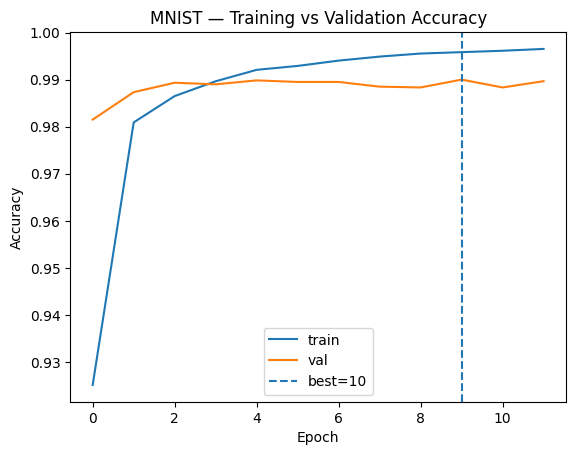

Best epoch (by validation accuracy): 10


In [59]:
history = model.fit(
    x_train, y_train,
    epochs=12, batch_size=128,
    validation_split=0.1,
    verbose=0
)

val_acc = history.history['val_accuracy']
best_epoch = int(max(range(len(val_acc)), key=lambda i: val_acc[i]) + 1)

plt.figure()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.axvline(best_epoch-1, linestyle='--', label=f'best={best_epoch}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('MNIST — Training vs Validation Accuracy')
plt.show()

print("Best epoch (by validation accuracy):", best_epoch)


### (b) Test accuracy at the optimal epoch; definition; classification of 10,000 images
- **Definition:** Test accuracy = proportion of correct predictions on the held-out test set (unseen during training/validation).  
- **Classification of 10,000 images:** Each 28×28 image passes once through the CNN; the final softmax produces 10 probabilities; `argmax` selects the predicted digit; accuracy compares predictions with labels across all 10,000 samples.  

The model was retrained for exactly **10 epochs** (the optimal value determined by validation accuracy).  
The resulting test accuracy was **99.02%**, meaning about **9,902 out of 10,000** handwritten digits were correctly classified.


In [60]:
# Retrain exactly to the optimal epoch (to satisfy "trained with the optimal number of epochs")
opt_model = build_model()
opt_history = opt_model.fit(
    x_train, y_train,
    epochs=best_epoch, batch_size=128,
    validation_split=0.1,
    verbose=0
)
test_loss, test_acc = opt_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy @ optimal epoch ({best_epoch}): {test_acc:.4f}")


Test accuracy @ optimal epoch (10): 0.9902


### (c) Why Conv2D output = 26 × 26 × 32
Input 28×28×1, kernel 3×3, padding='valid' → spatial size 28−3+1=26; 32 filters → depth 32; result **26×26×32**.

### (d) Why Conv2D parameters = 320
Per filter: 3×3×1 weights + 1 bias = 10; with 32 filters → **320** parameters.


In [62]:
# Quick check of the first conv layer
first = opt_model.layers[0]
print("Kernel shape:", first.kernel.shape)    # (3, 3, 1, 32)
print("Bias length:", len(first.bias.numpy()))# 32
print("Parameter count:", first.count_params()) # 320


Kernel shape: (3, 3, 1, 32)
Bias length: 32
Parameter count: 320
